# Model Development

In this section, several models has been developed that predicts the price of the car using the variables. 

### Questions:

* Do I know if the dealer is offering fair value for my trade-in?
* Do I know if I put a fair value on my car?

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result. 

### Setup

Import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression and Multiple Linear Regression

Linear Regression

__Simple Linear Regression__

this helps us to understand the relationship between two variables: 

* the predictor/independent variable(X)
* The response/dependent variable(Y)

the result of the linear regression is a __linear function__ that predicts the response(dependent variable) as a function of the predictor (independent) variable. 

$$ Y: Response Variable(X): Predictor Variable $$

__Linear Function__

$$ \hat{y} = a + bX $$

* a refers to the intercept of the regression line, the value of Y when X is 0.
* b refers to the slope of the regression line, the value with which Y changes when X increases by 1 unit

##### Load the modules for linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

##### Create the linear regression object

In [64]:
lm = LinearRegression()

##### Taking 'highway-mpg' as predictor to predict car price. 


In [65]:
X = df[['highway-mpg']]
Y = df['price']

##### Fit the linear model using highway-mpg


In [66]:
lm.fit(X,Y)

LinearRegression()

##### Output a prediction

In [67]:
yhat = lm.predict(X)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

##### Value of the intercept (a)

In [68]:
lm.intercept_

np.float64(38423.3058581574)

##### Value of the slope(b)

In [69]:
lm.coef_

array([-821.73337832])

##### Final estimated linear model: 

Putting the actual value we get from above: 

$$price = 38423.31 - 821.73 * highway-mpg$$

#### Taking 'engine-size' as the predictor

In [70]:
# Create a linear regression object called lm1
lm1 = LinearRegression()
lm1


LinearRegression()

In [71]:
# Choose the features: 
X = df[['engine-size']]
Y = df['price']

In [72]:
# train the model
lm1.fit(X, Y)
lm1

LinearRegression()

In [73]:
# output a prediction

yhat1 = lm1.predict(X)
yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [74]:
# Find the slope and intercept of the model
# intercept
print(lm1.intercept_)

#slope
print(lm1.coef_)

-7963.338906281042
[166.86001569]


### Estimated Linear model: 

$$ price = -7963.34 + 166.86 * df['engine-size']$$

In [75]:
yhat1 = -7963.34 + 166.86 * X
print(yhat1)
Price = -7963.34 + 166.86 * df['engine-size']
print(Price)

     engine-size
0       13728.46
1       13728.46
2       17399.38
3       10224.40
4       14729.62
..           ...
196     15563.92
197     15563.92
198     20903.44
199     16231.36
200     15563.92

[201 rows x 1 columns]
0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64


__Multiple Linear Regression__

* predict car price using more than one variable

* Most of the real-world regression models involve multiple predictors.

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$


$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


The equation is: 

$$ \hat{y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4$$

From the previous EDA, we already know that other good predictions of price could be: 


<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>


In [76]:
Z = df[['horsepower', 'curb-weight', 'engine-size','highway-mpg']]

In [77]:
# fit the linear model using the four above variables

lm.fit(Z, df['price'])

LinearRegression()

In [78]:
# value of intercept

lm.intercept_

np.float64(-15806.62462632922)

In [79]:
# value of slope
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [80]:
# final estimated linear model is: 

price = -15806.62 + 53.49574423 * df['horsepower'] + 4.70770099 * df['curb-weight'] + 81.53026382 * df['engine-size'] + 36.05748882 * df['highway-mpg']
price

0      13699.116227
1      13699.116227
2      19051.659316
3      10620.366546
4      15521.318816
           ...     
196    16694.405050
197    19503.683814
198    20475.462992
199    17804.043425
200    17104.079693
Length: 201, dtype: float64

### Final estimated linear model is: 

price = -15806.62 + 53.49574423 * horsepower + 4.70770099 * curb-weight + 81.53026382 * engine-size + 36.05748882 * highway-mpg

#### let's take the predictor varaibles 'normaliszed-losses' and 'highway-mpg'

In [81]:
K_2 = df[['normalized-losses','highway-mpg']]
X = df['price']

In [82]:
#fit the linear model

lm1 = LinearRegression()
lm1.fit(K_2, X)

LinearRegression()

In [83]:
# slope

lm1.coef_

array([   1.49789586, -820.45434016])

In [84]:
# intercept
lm1.intercept_

np.float64(38201.31327245728)

In [85]:
# the model is: 

print("price =, 38201.31 + 1.49789586 , * normalised-losses  -820.45434016 * highway-mpg")

price =, 38201.31 + 1.49789586 , * normalised-losses  -820.45434016 * highway-mpg


In [86]:
print("price =", lm1.intercept_, "+" , lm1.coef_[0], "* normalised-losses", lm1.coef_[1], "highway-mpg")

price = 38201.31327245728 + 1.4978958634133213 * normalised-losses -820.4543401631865 highway-mpg


## Model Evaluation for Linear model
### 1. Using Visualisation

We have develop some models, now how do we evaluate models and choose the best one? 

One way to do this is by using a visualization

In [87]:
import seaborn as sns
%matplotlib inline

a. Regression plot

For simple linear regression, an excellent way to visualize the fit of our model is by using __regression plots__. 

* show a combination of a scattered data points (a scatterplot), with the fitted linear regression line going through the data. 
* give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).


#####  visualize highway-mpg as potential predictor variable of price:


(0.0, 48166.81454952638)

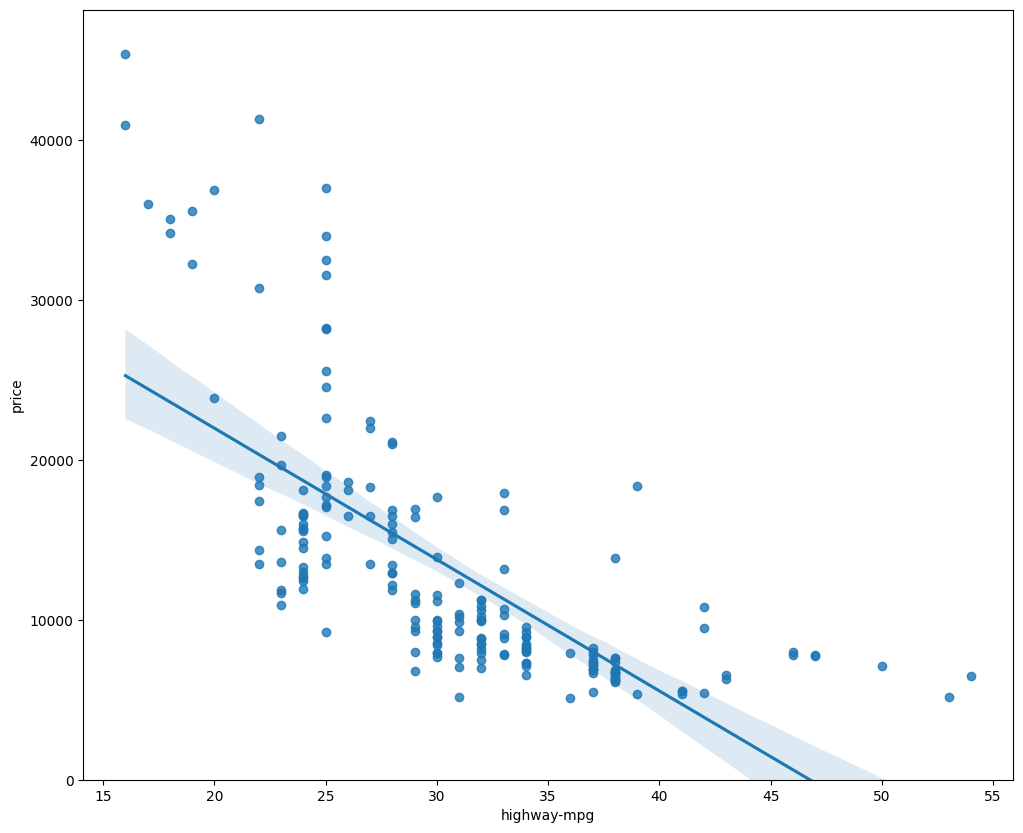

In [88]:
plt.figure(figsize=(12, 10))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

Insigths: 

*  The price is negatively correlated to highway-mpg since the regression slope is negative.

__Note:__ 

i. Keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. 

ii. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.



#### Compare this plot to the regression plot of 'peak-rpm'

(0.0, 47414.1)

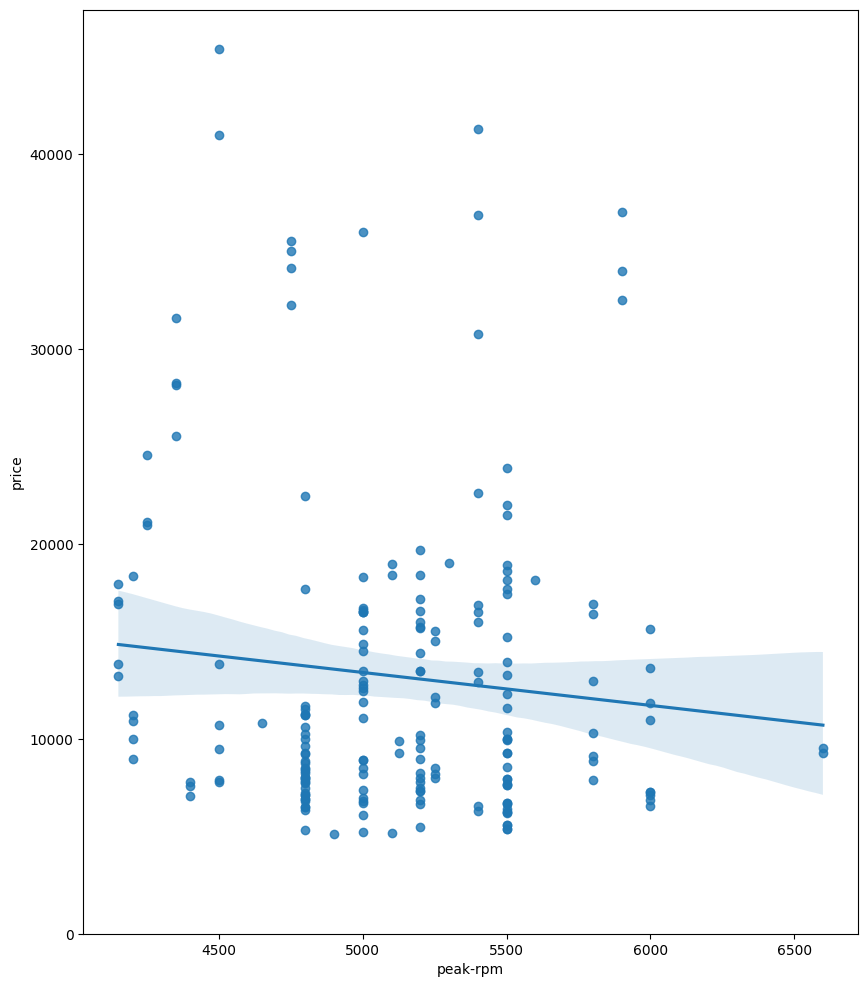

In [89]:
plt.figure(figsize=(10, 12))
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)

The scores for "highway-mpg" are significantly closer to the produced line and, on average, fall. The "peak-rpm" points are more dispersed around the expected line, making it more difficult to see if they are rising or falling with an increase in "peak-rpm."


##### Given the regression plots above, to know which are more strongly corrleated between'peak-rpm' or 'highway-mpg' with 'price'. We use corr() method. 

In [90]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.




### 2. Using Residual plot

* A good way to visualize the variance of the data is to use a residual plot
* __residual__: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line
* __residual plot graph__: A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.
* __pay attention__:  the spread of the residuals: 

    -  If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. 
    - reason: Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.


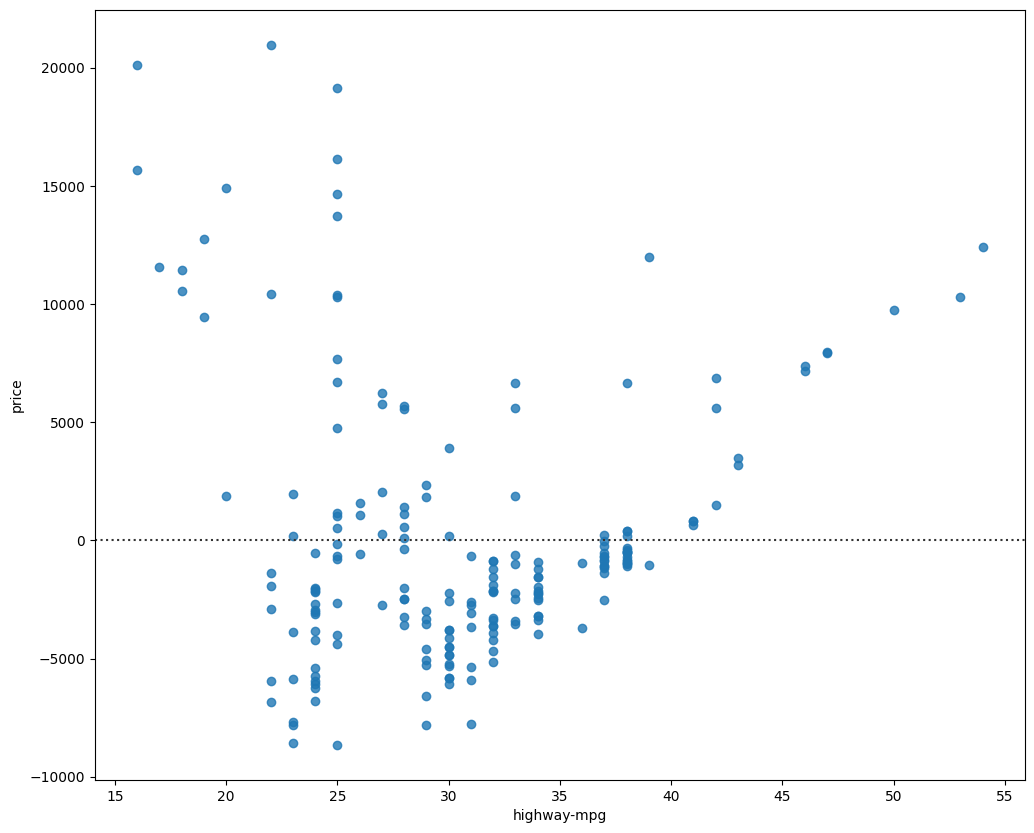

In [91]:
plt.figure(figsize=(12, 10))
sns.residplot(x = df['highway-mpg'], y = df['price'])
plt.show()

Since the residuals are not dispersed randomly along the x-axis, we might be better off using a non-linear model to explain the data.

## Model Evaluation for Multiple Linear Regression

For multiple Linear Regression, we can't visulize with regression or residual plot. 

So, one way of looking at the fit of the model is by looking at the __distribution plot__. 

Look the distribution of the fittted values that results from the model and compare it to the distribution of the actual values. 

#### In order to get the fitted values, we need a prediction. 

In [92]:
Y_hat = lm.predict(Z)


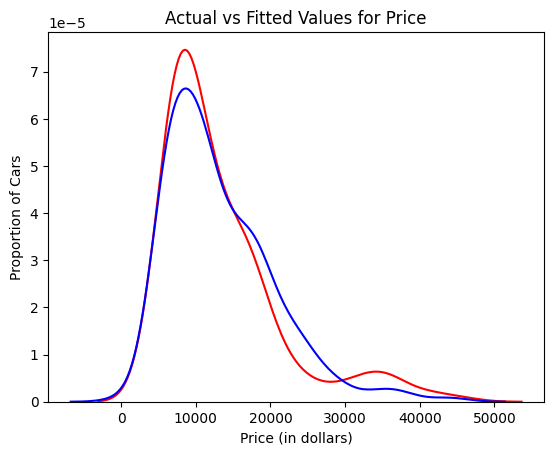

In [101]:

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value", fill=False)
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=False, ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


It seems that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. 

There is, however, some improvments can be done. 